### IDs:
Insert yours IDs to the cell below

ID #1:310116165

ID #2:308564293


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

Binomial distribution with p=0.03. If X is the number of defective products out of n, we are looking for P=85% for at least 1  defective product:

$0.85 = 1-P(X=0) \rightarrow P(X=0) = 0.15$

In [2]:
#imports
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt

def binom_PDF(n,k,p):
    "helper function: binom PDF"
    return math.comb(n, k)*(p**k)*(1-p)**(n-k)

def binom_find_n(target_k,p,target_P,max_n):
    """recieves the target P and calcualtes n iteratively
    the value of n is the number of trials to have probablility >= target_p"""
    for n in range(1,max_n):
        P = 0
        for k in range(0,target_k+1):
            P += binom_PDF(n,k,p)
        P = 1 - P
        if (P >= target_P):
            return {n,P}
    return "error"

binom_find_n(0,0.03,0.85,1000)

{0.8532360949640706, 63}

So we will require at least 63 samples and the probability of at least 1 defective prodcut is $1-0.146 = 0.854$.

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [3]:
binom_find_n(0,0.04,0.95,1000)

{0.9512391525501656, 74}

So we will require at least 74 samples to have a $1-0.048 = 0.952$ probabillity of a defective product.

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

1. $P(X >=5) = 1-P(X=0)-P(X=1)-P(X=2)-P(X=3)-P(X=4)$

In [4]:
binom_find_n(4,0.1,0.9,1000)

{0.9006056767326882, 78}

So we will require at least 78 products for 90% probability.

2. Similarly, $P(X >= 5) = 1 - P(X=0)- P(X=1) - ... - P(X=14)$:

In [5]:
binom_find_n(14,0.3,0.9,1000)

{0.902570602815726, 64}

So we will require at least 64 products for 90% probability.

Intuitively we would expect for both cases to have the same amount of required trials, because the probability of defects and the amount of defects were multiplied by 3. But it practice you need less trials because the probability of non defective products became lower (case 2 is not the same as repeating case 1 thrice).  

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

### Solution
Our solution will create the required distribution by dividing the population into equal size bins and placing 50% of the popualtion in the median value. The rest of the population will be placed so to satisfly the median and IQR conditions.

Let us define helper functions:

In [332]:
# import numpy as np
import pandas as pd

def get_IQR(dist):
    return np.quantile(dist,0.75) - np.quantile(dist,0.25)

def dict_to_population(d):
    res=[]
    for rent,amount in d.items():
        res += [rent]*amount
    return np.array(res)

def sanity_check(SH_pop,RG_pop):
    return pd.DataFrame({
    "median":[np.median(SH_pop),np.median(RG_pop)],
    "mean":[np.mean(SH_pop),np.mean(RG_pop)],
    "population":[len(SH_pop),len(RG_pop)],
    "IQR":[get_IQR(SH_pop),get_IQR(RG_pop)],
    "variance":[np.std(SH_pop),np.std(RG_pop)],
    },index=["SH","RG"]).T

def hist_plotting_script(SH_pop,RG_pop,title):
    hist_kwargs=dict(alpha=0.3,bins=range(0,max(np.concatenate((SH_pop,RG_pop)))+100,100))
    plt.hist(SH_pop,label="SH",**hist_kwargs);
    plt.hist(RG_pop,label="RG",**hist_kwargs);
    plt.legend();
    plt.grid();
    plt.title(title);

The first two scenarios:

In [329]:
SH1={ # SH rests values (rent:amounts of people with the rent) 
    4600:8001, # makes the median requirement true
    8000:4998, # makes the mean requirement true
    8000+200*(1):500,
    8000+200*(2):500,
    8000+200*(3):500,
    8000+200*(-1):500,
    8000+200*(-2):500,
    8000+200*(-3):500,
    11400:1,
}
# RG was constructed the same way as SH with an additional shift of 2000 from the median to the extreme quarters of the population 
# so that the mean and median will remain the same but the IQR will increase 
RG1 = {
    6600:1500,
    6500:1500,
    6400:1500,
    6300:1500,
    4600:5001,
    3800:4998,
    3000:1,
    2100:1500,
    2000:1500,
    1900:1500,
    1800:1500,
}

And we can check the parameters of the distributions:

In [330]:
# sanity check (make sure the population are proper)
SH_pop1 = dict_to_population(SH1)
RG_pop1 = dict_to_population(RG1)
sanity_check(SH_pop1,RG_pop1)

,SH,RG
median,4600.000000,4600.000000
mean,6300.000000,4200.000000
population,16000.000000,22000.000000
IQR,3400.000000,4200.000000
variance,1710.685535,1685.516916


And ploting the histograms using a bin size of 100RCU: 

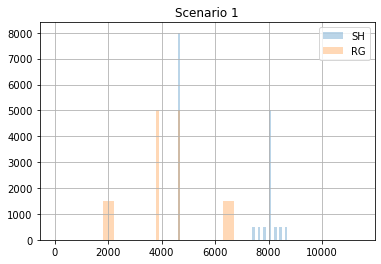

In [333]:
hist_plotting_script(SH_pop1,RG_pop1,"Scenario 1")

#### Scenario 2:

In [334]:
SH2={ # SH rests values (rent:amounts of people with the rent) 
    4600:8001, # makes the median requirement true
    8000:3998, # makes the mean requirement true
    8000+150*(1):500,
    8000+150*(2):500,
    8000+150*(3):500,
    8000+150*(4):500,
    8000+150*(-1):500,
    8000+150*(-2):500,
    8000+150*(-3):500,
    8000+150*(-4):500,
    11400:1,
}
# RG was constructed the same way as SH with an additional shift of 2000 from the median to the extreme quarters of the population 
# so that the mean and median will remain the same but the IQR will increase 
RG2 = {
    6800:1500,
    6650:1500,
    6500:1500,
    6250:1500,
    4600:5001,
    3800:4998,
    3000:1,
    2150:1500,
    1900:1500,
    1750:1500,
    1600:1500,
}

In [335]:
# sanity check (make sure the population are proper)
SH_pop2 = dict_to_population(SH2)
RG_pop2 = dict_to_population(RG2)
sanity_check(SH_pop2,RG_pop2)

,SH,RG
median,4600.000000,4600.000000
mean,6300.000000,4200.000000
population,16000.000000,22000.000000
IQR,3400.000000,4100.000000
variance,1712.785013,1762.826759


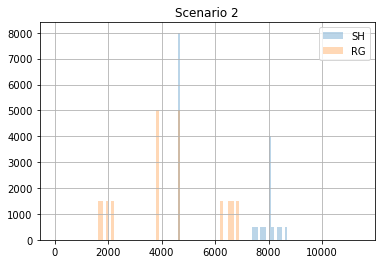

In [336]:
hist_plotting_script(SH_pop2,RG_pop2,"Scenario 2")

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [337]:
SH3={ # same distribution as the 1st scenario, but: 
    600:1000,# I lowered the rent by 4000 to 1000 people from the lower quarter  
    4600:7001, 
    8000:4998,
    8000+200*(1):500,
    8000+200*(2):500,
    8000+200*(3) + 8000:500, # I increased the rent by 8000 to 500 people from the upper quarter  
    8000+200*(-1):500,
    8000+200*(-2):500,
    8000+200*(-3):500,
    11400:1,
}
# this way the variance of SH should rise but the rest of the properties are conserved 


# Propose a 3rd distribution for RG
RG3 = {
    6700:1500,
    6650:1500,
    6500:1500,
    6300:1500,
    4600:5001,
    3800:4998,
    3000:1,
    2150:1500,
    1950:1500,
    1700:1500,
    1650:1500,
}

In [338]:
SH_pop3 = dict_to_population(SH3)
RG_pop3 = dict_to_population(RG3)
sanity_check(SH_pop3,RG_pop3)

,SH,RG
median,4600.000000,4600.000000
mean,6300.000000,4200.000000
population,16000.000000,22000.000000
IQR,3400.000000,4150.000000
variance,2815.394289,1752.352704


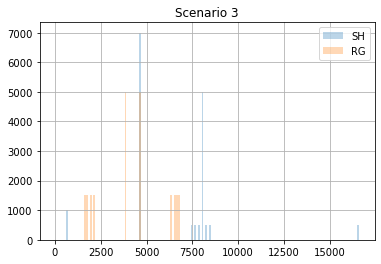

In [339]:
hist_plotting_script(SH_pop3,RG_pop3,'Scenario 3')

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

Solution: for this excersize we will use SH1 and RG1 from part 1 and generate PHI for SH and RG as following:

In [341]:
#we will use the same bins as in SH1
SH_PHI_counts = {
    12000:8001, # makes the median requirement true
    13000:4998, # makes the mean requirement true
    13000+200*(1):500,
    13000+200*(2):500,
    13000+200*(3):500,
    13000+200*(-1):500,
    13000+200*(-2):500,
    13000+200*(-3):500,
    14000:1,
}

d = 200
base = 8687.5
RG_PHI_counts = {
    8000:6001,
    base:3998+d*8,
    9375:1,
    base+1200*(1):1500-d,
    base+1200*(2):1500-d,
    base+1200*(3):1500-d,
    base+1200*(4):1500-d,
    base+1200*(-1):1500-d,
    base+1200*(-2):1500-d,
    base+1200*(-3):1500-d,
    base+1200*(-4):1500-d,
}

SH_PHI = np.array(dict_to_population(SH_PHI_counts))
RG_PHI = np.array(dict_to_population(RG_PHI_counts))

sanity_check(SH_PHI,RG_PHI)

,SH,RG
median,12000.000000,8000.000000
mean,12500.000000,8500.000000
population,16000.000000,22000.000000
IQR,1000.000000,687.500000
variance,533.970973,2280.185851


We will define a helper function to calculate the actual $\alpha$ using: $\alpha = \frac {cov(rent, PHI)}{\sqrt{Var(rent)} x \sqrt{Var(PHI)}}$ while noting the square root of the variance is the standard deviation.

In [342]:
def get_alpha(d1,d2):
    d1,d2=np.array(d1),np.array(d2)
    d1,d2 = sorted(d1), sorted(d2)
    plt.scatter((d1),(d2))
    return np.cov(d1,d2)[1,0]/(np.std(d1)*np.std(d2))

And for SH, using scenario 1 of the rent distrubution and the PHI distribution we recieve $\alpha = 0.96\%$ which is within 1% from $\alpha = 0.97\%$.

0.9693733860311751


Text(0, 0.5, 'SH PHI')

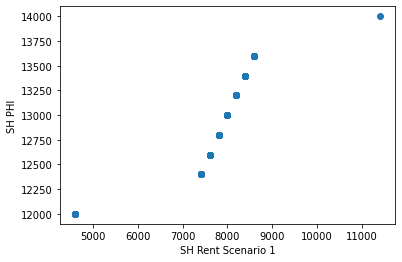

In [343]:
#calculate the alpha factor for SH
print(get_alpha(SH_pop1,SH_PHI))
plt.xlabel("SH Rent Scenario 1")
plt.ylabel("SH PHI")

And for RG using scenario 1 of the rent distrubution and the PHI distribution we recieve 𝛼=0.883% which is within 1% from  𝛼=0.89%.

0.8837069952055797


Text(0, 0.5, 'RG PHI')

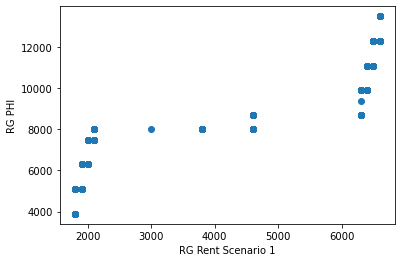

In [344]:
#calculate the alpha factor for RG
print(get_alpha(RG_pop1,RG_PHI))
plt.xlabel("RG Rent Scenario 1")
plt.ylabel("RG PHI")

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

<AxesSubplot:xlabel='Rent', ylabel='PHI'>

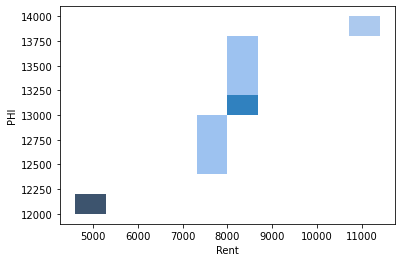

In [377]:
SH_bivariate = pd.DataFrame({'Rent':sorted(SH_pop1), 'PHI': sorted(SH_PHI)})
sb.histplot(SH_bivariate, x= 'Rent', y='PHI', bins = 10)

<AxesSubplot:xlabel='Rent', ylabel='PHI'>

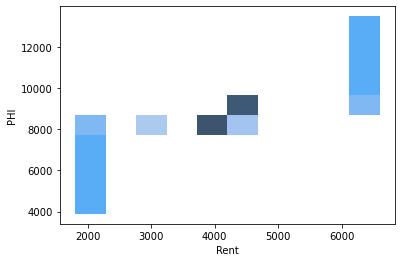

In [376]:
RG_bivariate = pd.DataFrame({'Rent':sorted(RG_pop1), 'PHI': sorted(RG_PHI)})
sb.histplot(RG_bivariate, x= 'Rent', y='PHI', bins = 10)

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

Y is a random variable based on X which is a multinomial random variable with $n = 20$. 
So to generate each Y value, we will run $n = 20$ repetitions with 6 possible outcomes, each with a probability taken from the vector $p$. The Y value is the total count of $ X = 2, X = 3$ and $X = 4$ values.

This experiment will be preormed $k = 100$ times and the results will be stored in a vector Y[100].

In [35]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [54]:
np.random.seed(1)
k = 100
Y = np.zeros((k))
for kk in range(0,k):
    Y[kk] = np.bincount(np.random.choice(range(6),p=[0.2,  0.1,  0.1,  0.1,  0.2,  0.3],size=(20,)))[[1,2,3]].sum()
#Y

Next we can compute the empirical central 3rd moment using the formula $E((X-\mu(X))^k)$.

In [55]:
mu = Y.mean(axis=0)
centralized_third_moment = ((Y - mu)**3).mean()
centralized_third_moment

1.8048960000000016

Another way to look at Y would be as a binomial distribution where there are 20 experiments. If the result is $X = 1, X = 2$ or $X = 3$ the experiment is sucessful. Therefore the probability of sucess is $P^* = 0.1 + 0.1 + 0.1 = 0.3$.

Plugging in the results to the formula for $\gamma_3$ we recieve:

In [68]:
n = 20
p = 0.3
gamma_3 = n*p*(1-p)*(1-2*p)
gamma_3

1.6799999999999997

As expected the result is relatively close to the observed value of the third moment. By increasing the number of experiments to 100,000, a closer result is achieved:

In [67]:
k = 100000
Y = np.zeros((k))
for kk in range(0,k):
    Y[kk] = np.bincount(np.random.choice(range(6),p=[0.2,  0.1,  0.1,  0.1,  0.2,  0.3],size=(20,)))[[1,2,3]].sum()
mu = Y.mean(axis=0)
centralized_third_moment = ((Y - mu)**3).mean()
centralized_third_moment

1.697407059465469

(array([  8.,  12.,  63., 155., 247., 269., 156.,  63.,  22.,   5.]),
 array([-0.50122414, -0.06940178,  0.36242059,  0.79424296,  1.22606532,
         1.65788769,  2.08971006,  2.52153242,  2.95335479,  3.38517716,
         3.81699952]),
 <BarContainer object of 10 artists>)

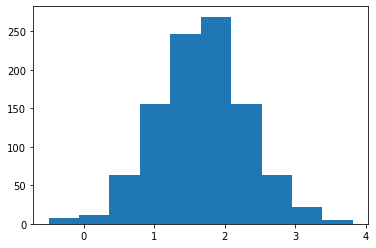

In [63]:
# Test the distribution of the third moment
experiment_res = []
for _ in range(1000):
    pop = np.random.multinomial(20,[0.2,  0.1,  0.1,  0.1,  0.2,  0.3],1000)[:,[1,2,3]].sum(axis=1)
    mu = pop.mean()
    gamma3 = ((pop-mu)**3).mean()
    experiment_res.append(gamma3)
plt.hist(experiment_res)

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

By definition of variance, $Var(X+Y+Z) = E[(X+Y+Z)^2] - E[X+Y+Z]^2$.

Expanding the first term:

$(X+Y+Z)^2 = (X+Y+Z)(X+Y+Z) = X^2+XY+YZ+YX+Y^2+YZ+ZX+ZY+Z^2 = X^2+Y^2+Z^2+2XY+2XZ+2YZ$

And using linearity of expectation we can write:

$E[(X+Y+Z)^2] = E[X^2+Y^2+Z^2+2XY+2XZ+2YZ] = E[X^2]+E[Y^2]+E[Z^2]+2E[XY]+2E[XZ]+2E[YZ]$

Let's deal with the second term. Again, using linearity of expectation:

$E[X+Y+Z]^2 = (E[X] + E[Y] + E[Z])^2 = E[X]^2 + E[Y]^2 + E[Z]^2 + 2E[X]E[Y]+2E[X]E[Z]+2E[Y]E[Z]$

And combining the two terms to yield:

$\underbrace{E[X^2] - E[X]^2}_{Var[X]} + \underbrace{E[Y^2] - E[Y]^2}_{Var[Y]} + \underbrace{E[Z^2] -  E[Z]^2}_{Var[Z]} + 2(\underbrace{E[XY]-E[X]E[Y]}_{Cov(X,Y)} + \underbrace{E[XZ]E[X]E[Z]}_{Cov(X,Z)} + \underbrace{E[YZ]E[Y]E[Z]}_{Cov(Y,Z)}$

Using the definition of covariance: $Cov(x,y) = E[xy]-E[x]E[y]$. So overall:

$Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z) + 2(Cov(X,Y) + Cov(X,Z) + Cov(Y,Z))$




### pairwise indpendence vs collective independence

If X,Y,Z are pairwise inidependent then all the covariance terms are zero and the variance is linear.

Pairwise independence doesnt mean collective independence which means that the variance is not taking multiple-wise dependence other than pairwise into account.

Proof pairwise doesn't means collective independence: 
If we have an $\Omega={1,2,3,4}$ and the sets A={1,2}.B={1.3},C={1,4}. Assumming the probability to choose each element in the set is 1/4, we get that the probability for the chosen element to be in the set is identical for  A,B,C (P(A)=P(B)=P(C)=1/2). All the sets are pairwise independent ($P(A\cap B)=P(A\cap C)=P(B\cap C)=1/2$) but are not collectively independent ($P(A\cap B\cap C)=1/4$ which is different from P(A)P(B)P(C)=1/8)  

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [210]:
import functools
def conv(P1,P2):
    P_res = {} # a distribution in this method is a dictionary with values mapped to probabilities
    for v1,p1 in P1.items():
        for v2,p2 in P2.items():
            P_res[v1+v2] = P_res.get(v1+v2,0) + p1*p2
    return P_res

def NFoldConv(P, n):
    return functools.reduce(conv,[P]*n)

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [211]:
p_res = NFoldConv({i:1/8 for i in range(8)},17)

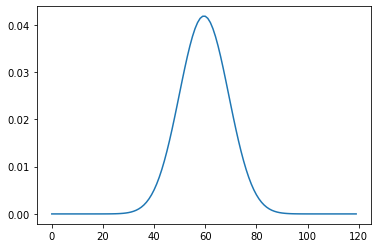

In [212]:
import pandas as pd
pd.Series(p_res).plot();

### Question 6 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 6.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

In [1]:
%pylab inline
from scipy import stats
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


W is a binom distribution ('sum of n bernouli trials')

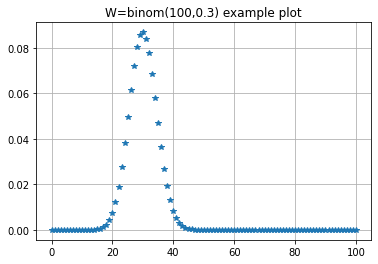

In [2]:
plt.plot([stats.binom(100,0.3).pmf(k) for k in range(101)],'*');
plt.grid()
plt.title("W=binom(100,0.3) example plot");

#### 6.B
State a formula for comuting $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

for each value the binom can get, the C will get the binom coef with the same probability:

$E(C)=\sum_{k=0}^{n}{\binom{n}{k}P_W(\omega=k)} $

In [3]:
def get_EC(n,p):
    return np.array([stats.binom(n,p).pmf(k)*math.comb(n,k) for k in range(n+1)]).sum()
EC_res=[]
for n in [10,20,50,100]:
    for p in [0.1,0.5,0.8]:
        EC_res.append((n,p,get_EC(n,p)))

In [7]:
df_EC = pd.DataFrame(EC_res,columns=["n","p","E(C)"]).set_index(["n","p"])
df_EC

E(C)
n   p                
10  0.1  2.257596e+01
    0.5  1.804258e+02
    0.8  6.695001e+01
20  0.1  1.757746e+03
    0.5  1.314607e+05
    0.8  1.697943e+04
50  0.1  1.479310e+09
    0.5  8.960951e+13
    0.8  4.901520e+11
100 0.1  1.681569e+19
    0.5  7.143018e+28
    0.8  2.013008e+24

#### 6.C 
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$. 

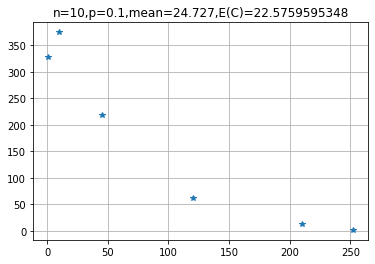

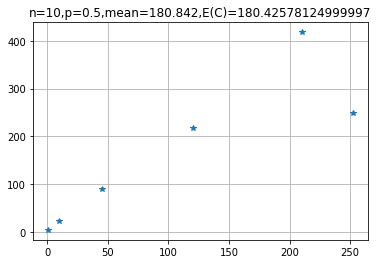

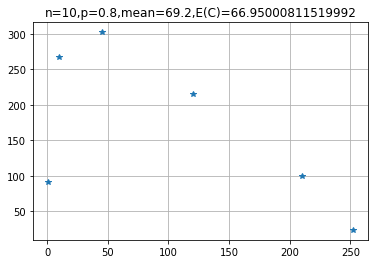

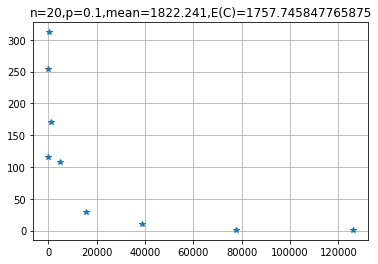

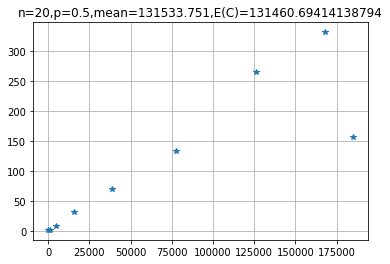

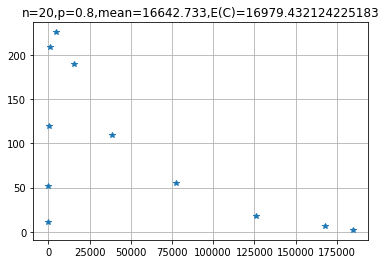

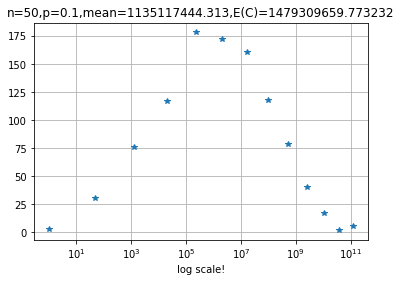

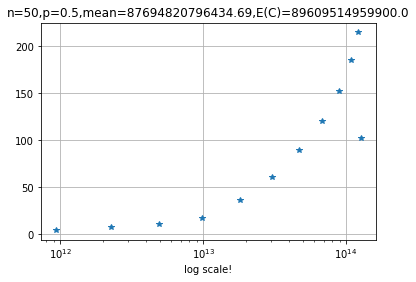

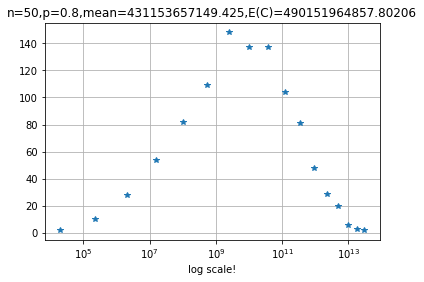

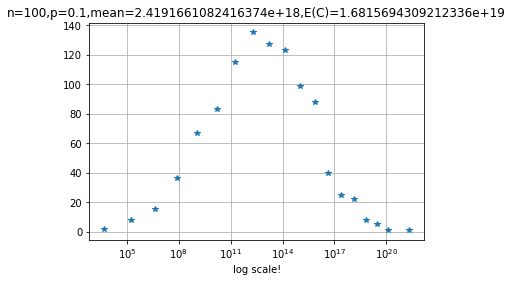

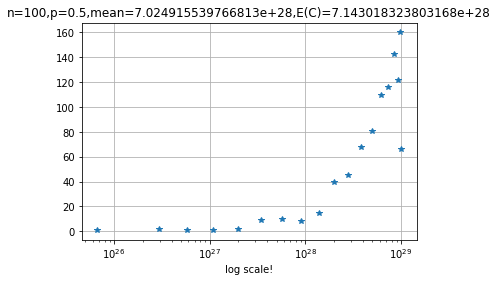

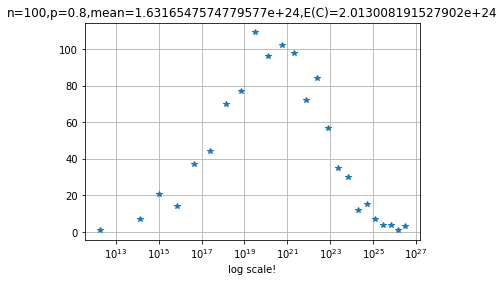

In [11]:
N_sample=1000
C_empirical_mean_res=[]
for n in [10,20,50,100]:
    n_map={k:math.comb(n,k) for k in range(n+1)} # a mapping from W values to C values 
    for p in [0.1,0.5,0.8]:
        plt.figure()
        # sample values (sample from W and then mapped the values to C)
        values_W = stats.binom.rvs(n,p,size=N_sample)
        # map the values from W to C 
        values_C = pd.Series(values_W).map(n_map)
        C_empirical_mean_res.append((n,p,values_C.mean()))
        histogram = values_C.value_counts()
        
        # plot hist
        histogram.plot(style='*')
        plt.grid()
        plt.title(f"n={n},p={p},mean={values_C.mean()},E(C)={df_EC.loc[(n,p),'E(C)']}")
        if n in [50,100]: 
            plt.xscale("log")
            plt.xlabel("log scale!")

#### 6.D
Use a scatter plot to compare the empirical and the computed values from the previous section

In [16]:
df_empirical_EC = pd.DataFrame(C_empirical_mean_res,columns=["n","p","empirical_mean"]).set_index(['n','p'])
df_comparison = df_EC.join(df_empirical_EC["empirical_mean"])

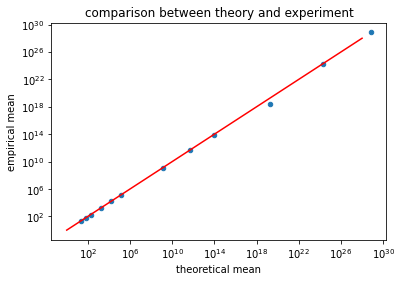

In [26]:
df_comparison.plot(kind="scatter",x="E(C)",y="empirical_mean")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("theoretical mean")
plt.ylabel("empirical mean")
plt.title("comparison between theory and experiment")
plt.plot([1,10**28],[1,10**28],'r');